In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [2]:
folder_path = "C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/sc/"
adata = sc.read(folder_path + "preprocessed_adata.h5ad")

# batch 확인

In [3]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# running time: 2m 19s

In [4]:
adata.obs['sample'].unique()

['Pt1', 'Pt2', 'Pt3', 'Pt4', 'Pt5', ..., 'Pt20', 'Pt21', 'Pt22', 'Pt23', 'Pt24']
Length: 24
Categories (24, object): ['Pt1', 'Pt2', 'Pt3', 'Pt4', ..., 'Pt21', 'Pt22', 'Pt23', 'Pt24']

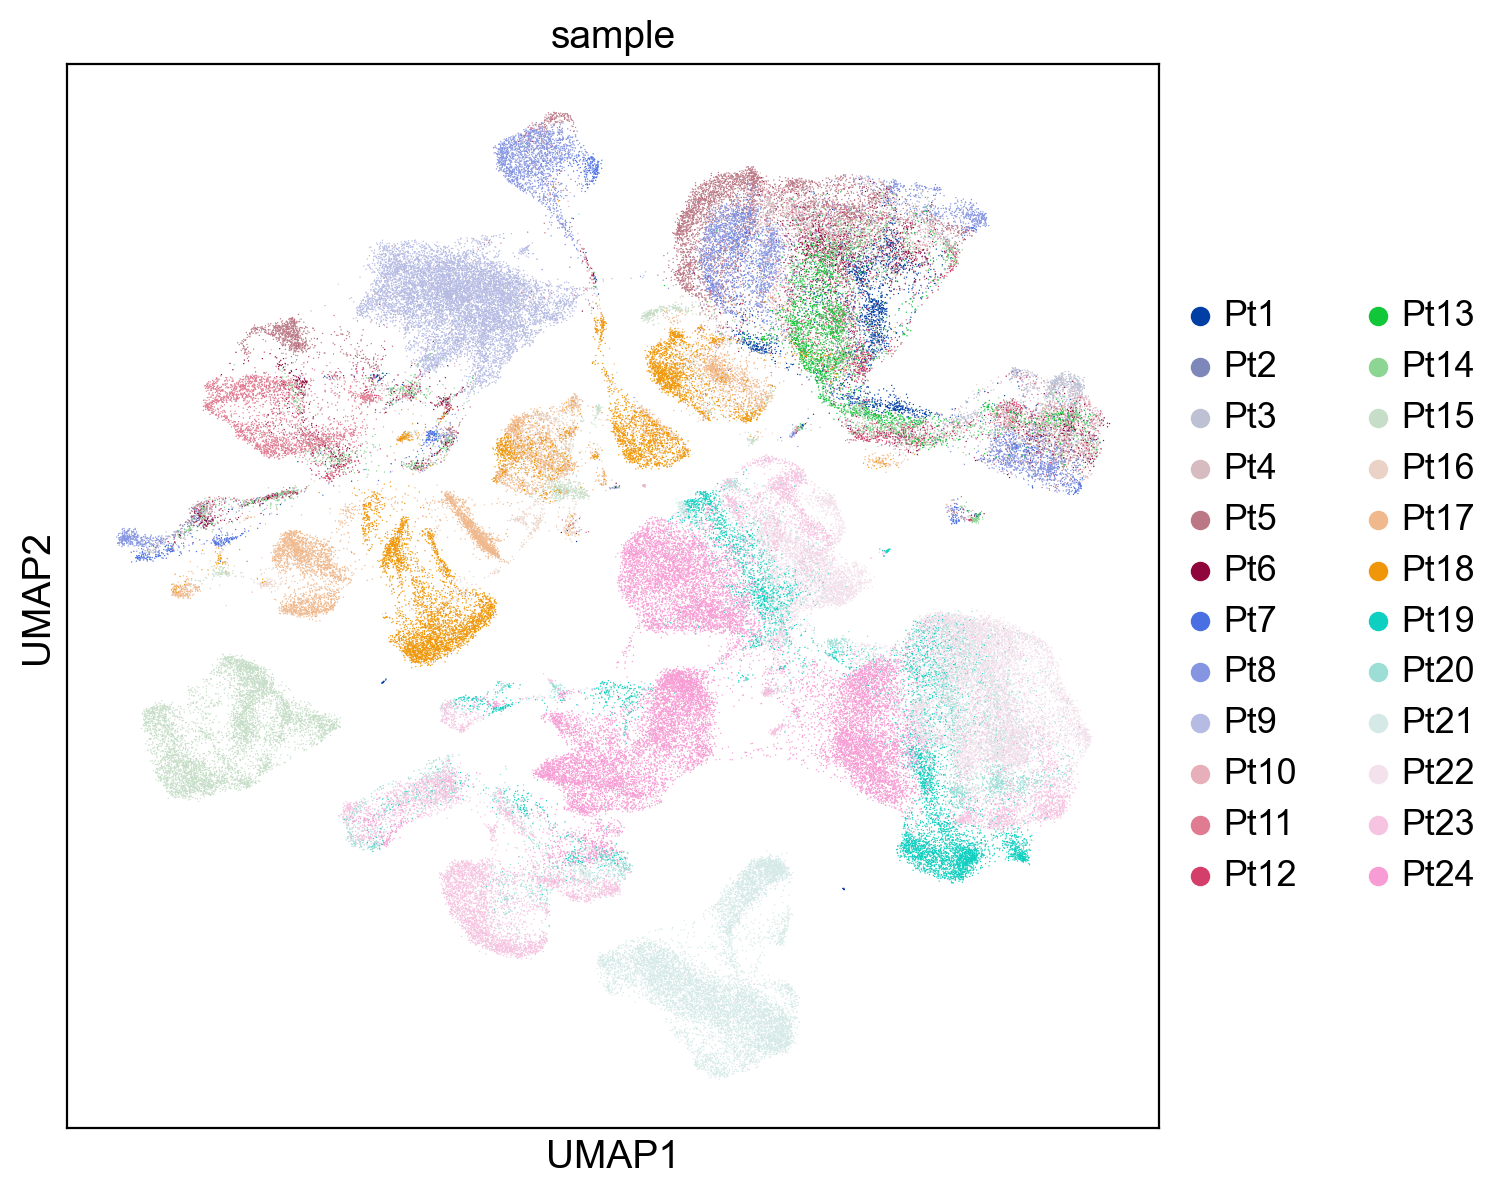

In [5]:
sc.settings.set_figure_params(dpi=100, figsize = (7, 7))
sc.pl.umap(
    adata,
    color = 'sample'
)

# batch correctino by scanorama

In [6]:
# import scanorama

sc.external.pp.scanorama_integrate(adata, key = 'sample', verbose = 1)

# running time: 4m 23s

Processing datasets Pt7 <=> Pt8
Processing datasets Pt12 <=> Pt14
Processing datasets Pt2 <=> Pt6
Processing datasets Pt6 <=> Pt10
Processing datasets Pt16 <=> Pt17
Processing datasets Pt4 <=> Pt10
Processing datasets Pt6 <=> Pt14
Processing datasets Pt4 <=> Pt6
Processing datasets Pt10 <=> Pt14
Processing datasets Pt20 <=> Pt22
Processing datasets Pt3 <=> Pt4
Processing datasets Pt10 <=> Pt12
Processing datasets Pt12 <=> Pt13
Processing datasets Pt16 <=> Pt18
Processing datasets Pt19 <=> Pt20
Processing datasets Pt13 <=> Pt14
Processing datasets Pt6 <=> Pt12
Processing datasets Pt2 <=> Pt4
Processing datasets Pt1 <=> Pt13
Processing datasets Pt20 <=> Pt23
Processing datasets Pt2 <=> Pt14
Processing datasets Pt5 <=> Pt8
Processing datasets Pt19 <=> Pt24
Processing datasets Pt1 <=> Pt14
Processing datasets Pt2 <=> Pt10
Processing datasets Pt1 <=> Pt12
Processing datasets Pt4 <=> Pt14
Processing datasets Pt4 <=> Pt5
Processing datasets Pt3 <=> Pt10
Processing datasets Pt2 <=> Pt5
Process

In [7]:
'X_scanorama' in adata.obsm

True

In [8]:
# sc.pp.pca(adata)
sc.pp.neighbors(adata, use_rep = 'X_scanorama')
sc.tl.umap(adata)

# running time: 1' 29"

c:\Users\heung\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


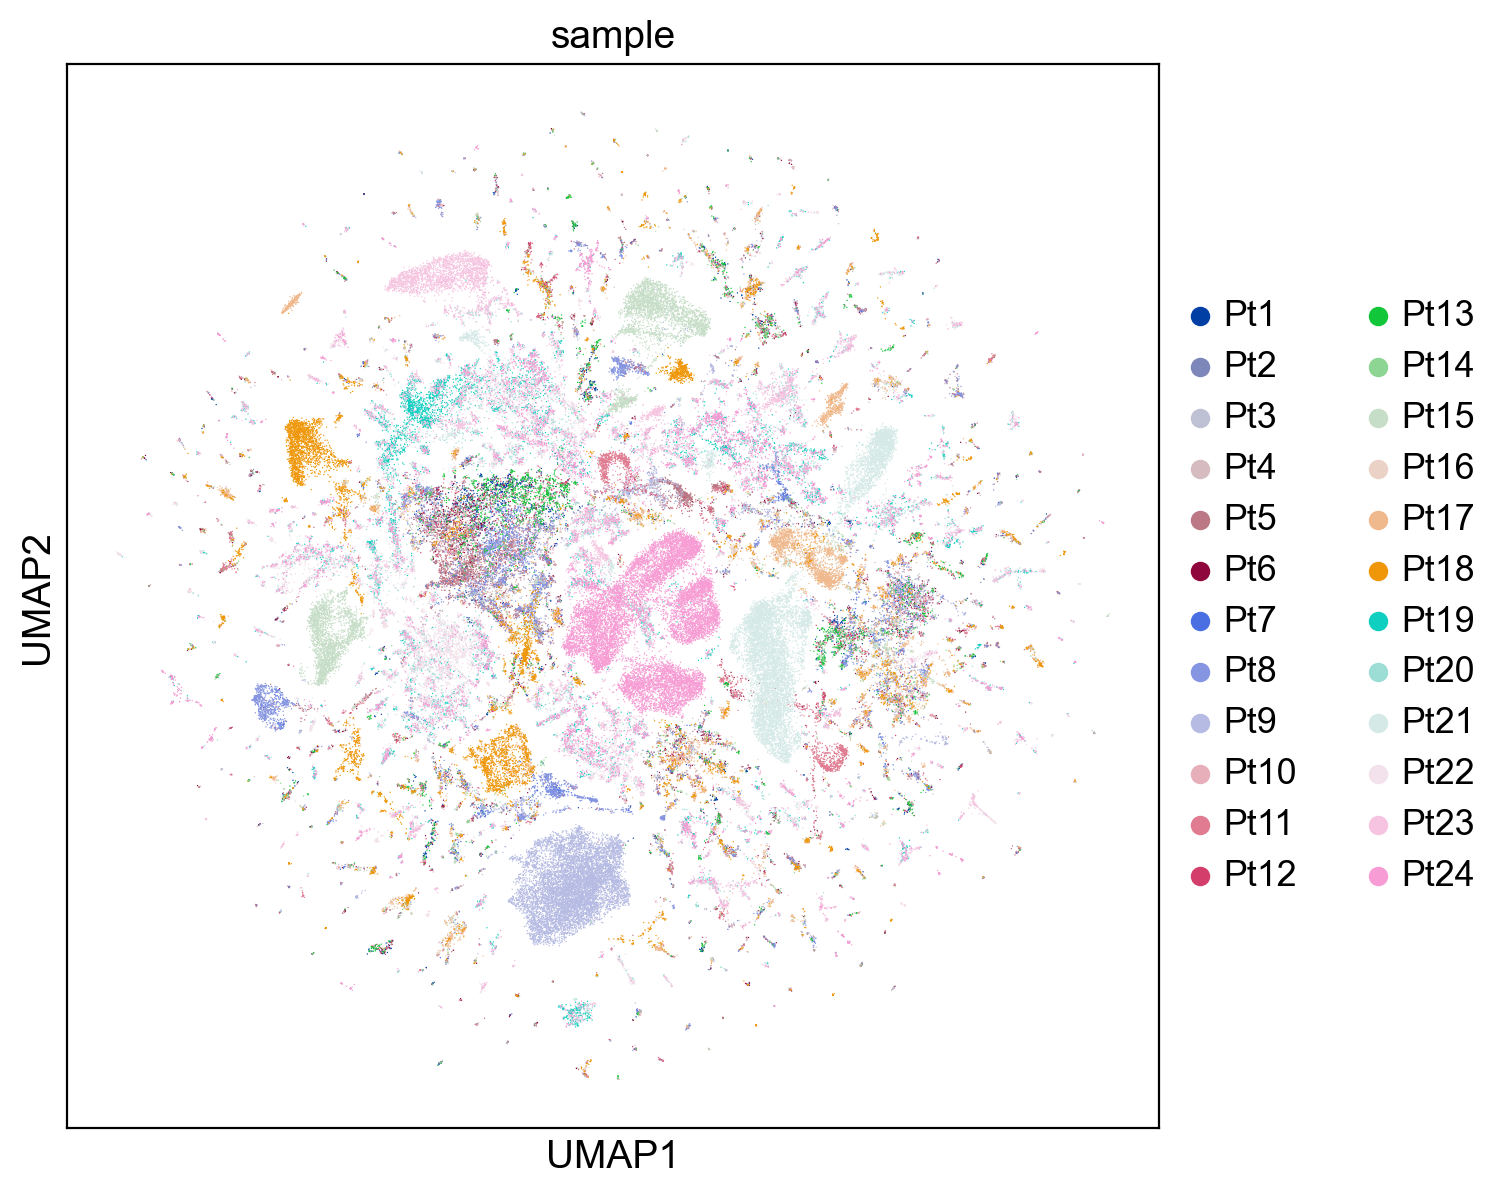

In [9]:
sc.settings.set_figure_params(dpi=100, figsize = (7, 7))
sc.pl.umap(
    adata,
    color = 'sample',
)

# Save

In [ ]:
adata.write_h5ad(folder_path + "adata_scanorama.h5ad")